# Project: Investigate a TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#ref">References</li>
</ul>

<a id = 'intro'> </a>
## Introduction

This is a dataset taken originally from the kaggle's The Movie Database. This data set contains information about 10,000 movies including user ratings and revenues.
There are few questions which I'm exploring:

- Questions
    - Which genres are most popular from year to year?
    - What kinds of properties are associated with movies that have high revenues?
    - Which month has the highest number of movie releases and highest revenue?
    - How the number of movie released and their runtime changed over the years?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load the date from the local directory
df = pd.read_csv('data-TMDB/tmdb-movies.csv')

In [3]:
df.head(1) 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
df.shape

(10866, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning (Replace this with more specific notes!)

- Convert the date datatype from object to datetime 

In [7]:
df['release_date'] = pd.to_datetime(df['release_date'])

- Convert 'budget_adj' and 'revenue_adj' to 'int' type

In [8]:
df['revenue_adj'] = df['revenue_adj'].round(0).astype(int)
df['budget_adj'] = df['budget_adj'].round(0).astype(int)

- Chek for duplicate records and drop them if available

In [9]:
df.duplicated().sum()
df.drop_duplicates(inplace= True)

- Make a copy of the imported data and assign it to 'tmdb' variable,so that we keep the original data  while manipulate it using another variable
    

In [10]:
tmdb = df.copy()

- Drop columns that are redundant for the exploaration phase

In [11]:
tmdb.drop(['imdb_id','cast', 'homepage', 'tagline', 'keywords', 'overview'], axis =1, inplace = True)

In [12]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null int64
revenue_adj             10865 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(8), object(4)
memory usage: 1.3+ MB


- Drop records that conatin 'NAN' or null values from the columns: 'genres', 'prodcution_companies', 'director'

In [13]:
tmdb.dropna(axis=0, inplace=True ,subset=['genres', 'production_companies', 'director'])

In [14]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 15 columns):
id                      9806 non-null int64
popularity              9806 non-null float64
budget                  9806 non-null int64
revenue                 9806 non-null int64
original_title          9806 non-null object
director                9806 non-null object
runtime                 9806 non-null int64
genres                  9806 non-null object
production_companies    9806 non-null object
release_date            9806 non-null datetime64[ns]
vote_count              9806 non-null int64
vote_average            9806 non-null float64
release_year            9806 non-null int64
budget_adj              9806 non-null int64
revenue_adj             9806 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(8), object(4)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Q1.Which genres are most popular from year to year?

In [15]:
genres_col = list(map(str, (tmdb['genres'])))
genres = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']

In [16]:
# create numpy arrays for both 'year' and 'popularity'
year = np.array(tmdb['release_year'])
poplty = np.array(tmdb['popularity'])

# create dataframe for genres and year
poplty_df = pd.DataFrame( index = genres, columns  = range(1960, 2016))


In [17]:
# fill the records with an initialization of Zero value 
poplty_df= poplty_df.fillna(value=0)

In [18]:
# fill the dataframe 'poplty_df' with the 'popularity' values from tmdb dataframe
val = 0
for i in genres_col:
    split_genre = list(map(str, i.split('|')))
    poplty_df.loc[split_genre, year[val]] =  poplty_df.loc[split_genre, year[val]] + poplty[val]
    val+=1

In [19]:
# Drop 'nan' row from poplty_df data frame
poplty_df.drop('nan', axis=0, inplace=True)

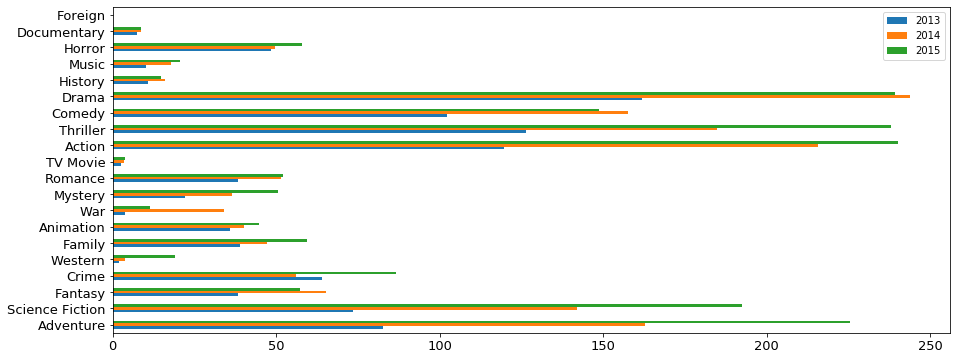

In [20]:
poplty_df.iloc[0:,53:].plot(kind='barh',figsize = (15,6),fontsize=13)

In [21]:
poplty_df['Total_popularity'] = poplty_df.sum(axis = 1)

- Total Popularity of Genres through out the 56 years from 1960 to 2015

Text(0, 0.5, 'Genres')

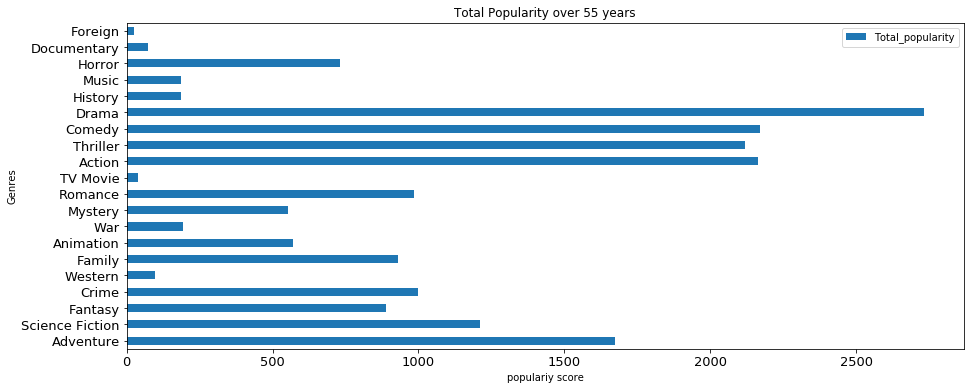

In [22]:
poplty_df.iloc[0:,-1:].plot(kind='barh',title = 'Total Popularity over 55 years',figsize = (15,6),fontsize=13, legend=True)
plt.xlabel("populariy score")
plt.ylabel("Genres")

In [23]:
temp_poplty_df = poplty_df.drop(columns = 'Total_popularity')

Now, we standardize the data so that they are correctly and precisely presented with no effect from the high or low values of popularity over the years so that the true change in the popularity can be observed.

In [24]:
def standardize(x):
    return( (x - x.mean())/ (x.std(ddof=0)))
std_poplty_df = standardize(temp_poplty_df)
std_poplty_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.704728,1.299912,2.084791,1.353124,0.500825,1.076537,0.962463,1.759620,1.498228,1.068184,...,0.590039,0.479107,0.723034,0.955827,1.027981,0.582515,0.732996,0.713321,1.141473,1.576933
Science Fiction,-0.513374,-0.483848,-0.670831,-0.706935,-0.723346,-0.922090,0.075359,-0.729568,1.415305,-0.745483,...,-0.351506,-0.377085,0.014361,0.644367,-0.141548,0.209255,0.162541,0.519378,0.865645,1.197335
Fantasy,-0.574839,-0.863660,-0.725104,-0.958040,-0.090281,-1.042999,-0.633638,-0.742508,-0.109109,-0.806982,...,0.005303,0.296190,-0.066974,0.144564,0.112135,-0.016329,0.057714,-0.239126,-0.153583,-0.359717
Crime,-0.653850,-0.141205,-0.202656,-0.076707,0.030998,-0.572724,-0.060937,0.476509,0.158154,0.562026,...,0.063771,0.293702,0.273208,-0.434117,-0.213603,-0.061127,0.065104,0.315814,-0.275778,-0.020605
Western,0.657211,-0.614835,-0.280348,-0.925499,-1.066861,-0.577109,-0.054841,-0.811506,-0.887495,0.966969,...,-1.081986,-1.080195,-1.111490,-1.174127,-1.024805,-1.020675,-0.914543,-1.020469,-0.970400,-0.799622


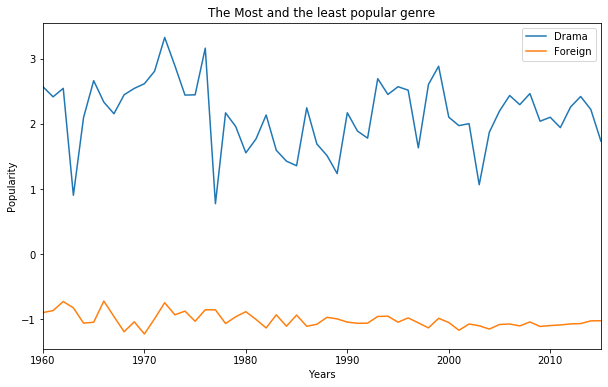

In [25]:
# Plotting the changes of the most and the least popular genres year by year.
few_genres = ['Drama', 'Foreign']

for g in few_genres:
    std_poplty_df.loc[g].plot(kind="line",legend=True, figsize=(10,6))
    plt.title("The Most and the least popular genre")
    plt.xlabel('Years') 
    plt.ylabel('Popularity')

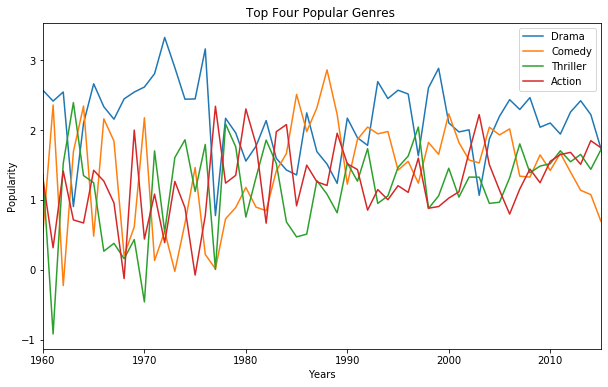

In [26]:
# Plotting the changes of the top 4 popular genres year by year.
top_four_genres = ["Drama", "Comedy", "Thriller", "Action"]
for g in top_four_genres:
    std_poplty_df.loc[g].plot(kind="line",legend=True, figsize=(10,6))
    plt.title("Top Four Popular Genres ")
    plt.xlabel("Years") 
    plt.ylabel("Popularity")

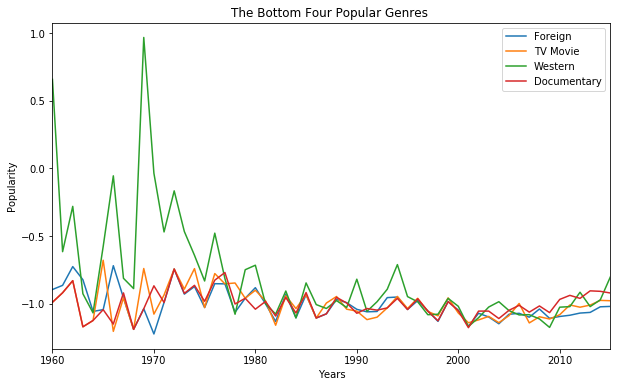

In [27]:
# Plotting the changes of the bottom 4 popular genres year by year.
bottom_four_genres = ["Foreign", "TV Movie", "Western", "Documentary"]
for g in bottom_four_genres:
    std_poplty_df.loc[g].plot(kind="line",legend=True, figsize=(10,6))
    plt.title("The Bottom Four Popular Genres ")
    plt.xlabel("Years") 
    plt.ylabel("Popularity")

## Q2. What kinds of properties are associated with movies that have high revenues?

In [28]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [29]:
# create a rvenue dataframe that contains the adjusted revenue values of movies over the years
rev_df = pd.DataFrame(tmdb['revenue_adj'].sort_values(ascending=False))

In [30]:
# Arrange the relevant features need for the evaluation
cols = ['id', 'popularity', 'budget_adj', 'revenue_adj', 'original_title', 'director', 'runtime', 'genres', 'release_year','vote_average']

In [31]:
# fill the values from tmdb dataframe to revenue dataframe
for i in cols:
    rev_df[i] = tmdb[i]
rev_df.head() 

,revenue_adj,id,popularity,budget_adj,original_title,director,runtime,genres,release_year,vote_average
1386,2827123750,19995,9.432768,240886903,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009,7.1
1329,2789712242,11,12.037933,39575591,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,1977,7.9
5231,2506405735,597,4.355219,271692064,Titanic,James Cameron,194,Drama|Romance|Thriller,1997,7.3
10594,2167324901,9552,2.010733,39289277,The Exorcist,William Friedkin,122,Drama|Horror|Thriller,1973,7.2
9806,1907005842,578,2.563191,28362748,Jaws,Steven Spielberg,124,Horror|Thriller|Adventure,1975,7.3


In [32]:
# creating temporary dataframe to select only the numerical values that may affect revenue
temp_rev_df = rev_df.loc[:,['popularity', 'budget_adj', 'revenue_adj','runtime', 'vote_average']]

In [55]:
def find_correlation(df):
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 4))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    f = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.6, annot=True,annot_kws = { 'fontsize' : 12 }, center=0, square=True, linewidths=.1, cbar_kws={"shrink": .6})
    plt.title("Diagonal correlation matrix among the features")

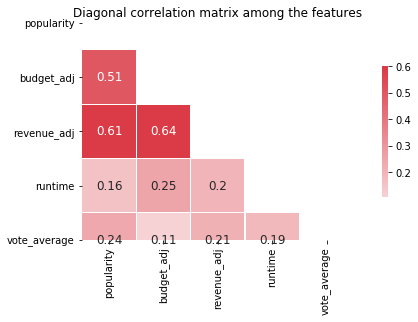

In [56]:
# find the correlation for the features of the 'temp_rev_df'
find_correlation(temp_rev_df)

Text(0.5, 1.0, 'Regression Plot')

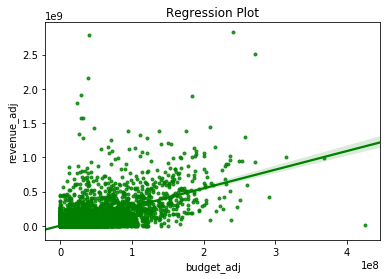

In [35]:
# Plot the regression plot for the highest correlation value
sns.regplot(x='budget_adj', y='revenue_adj', marker='.', color='g', data=temp_rev_df)
plt.title('Regression Plot')

Text(0.5, 1.0, 'Regression Plot')

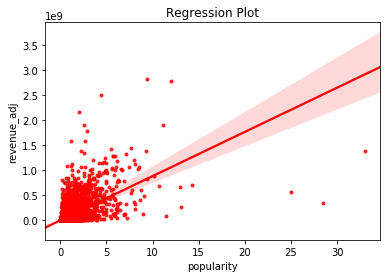

In [36]:
# Plot the regression plot for the second highest correlation value
sns.regplot(x='popularity', y='revenue_adj', marker='.', color='r', data=temp_rev_df)
plt.title('Regression Plot')

__*Hence, we see the features: 'popularity' and 'budget_adj' have the highest correlation with the revenue earned.*__

## Q3. Which month has the highest number of movie releases and highest revenue?

In [37]:
# Extract only the month's value from the 'release_date' column
month_data = tmdb['release_date'].dt.month
month_data.shape

(9806,)

In [38]:
# check if any month has 'Zero' value
month_data[month_data == 0] is True

False

In [39]:
release_counts = month_data.value_counts().sort_index()

In [40]:
# create new dataframe
release_df = pd.DataFrame(release_counts)

In [41]:
release_df.rename(columns = {'release_date' : 'Release Counts'}, inplace=True)

In [42]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
release_df['Months'] = months

In [43]:
release_df

,Release Counts,Months
1,752,Jan
2,628,Feb
3,741,Mar
4,725,Apr
5,742,May
6,769,Jun
7,717,Jul
8,846,Aug
9,1208,Sep
10,1039,Oct


Text(0.5, 1.0, 'Total number of Movie Released')

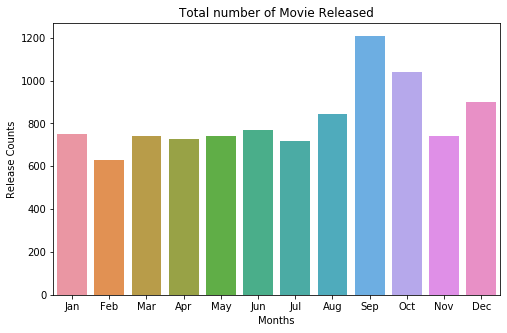

In [44]:
# Plot a bar graph showing the total number of movie released in each months 
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x= 'Months', y='Release Counts', data = release_df)
plt.title("Total number of Movie Released")

__*So, the month of September has the highest number of movies released while February has the lowest.*__

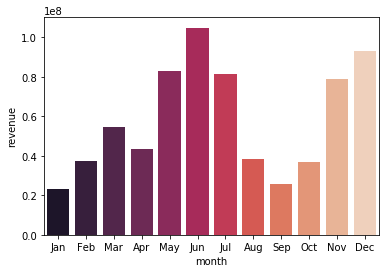

In [45]:
# Find the month with the highest revenue
month_release = pd.DataFrame(month_data)
month_release.rename(columns={'release_date' : 'release_month'}, inplace=True)

month_release['revenue'] = tmdb['revenue_adj']
avg_revenue = month_release.groupby('release_month').mean()

avg_revenue['month'] = months
sns.barplot(x='month', y='revenue', data= avg_revenue, palette='rocket' , )

__*So, the month of 'JUNE" has the earned the highest revenue*__

## Q4. How the number of movies released and their runtime changed over the years?

In [46]:
# Create a dataframe with the total count of movies released each year
movies_peryear = tmdb.groupby(['release_year']).count()['id']
movies_peryear = pd.DataFrame(movies_peryear)
movies_peryear.reset_index(inplace=True)
movies_peryear.rename(columns={'id' : 'num_of_movies'}, inplace=True)

In [47]:
# Create a dataframe with the average runtime of movies released each year
avg_runtime_peryear = tmdb.groupby(['release_year'])['runtime'].mean()
avg_runtime_peryear = pd.DataFrame(avg_runtime_peryear)
avg_runtime_peryear.reset_index(inplace=True)

In [48]:
# Merge above two dataframe to create on with 'release_year' as a common feature
numofmovie_runtime = pd.merge(movies_peryear, avg_runtime_peryear, on='release_year')

In [49]:
# Take a look at new dataframe
numofmovie_runtime.head()

,release_year,num_of_movies,runtime
0,1960,32,110.656250
1,1961,30,119.866667
2,1962,30,125.833333
3,1963,34,111.323529
4,1964,41,111.195122


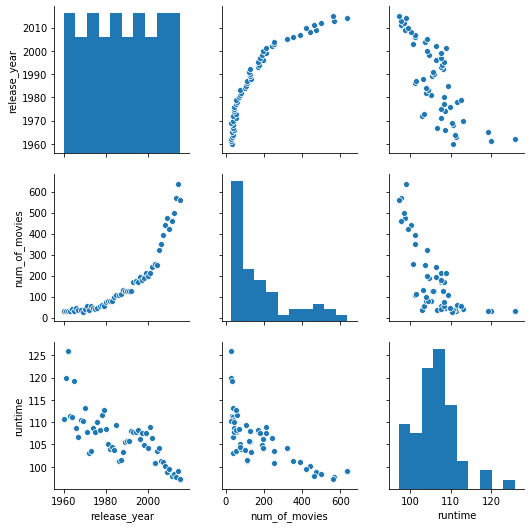

In [50]:
# Create pairplot of every features
sns.pairplot(numofmovie_runtime)

In [51]:
# Normalization function
def normalize(df):
    return (df- df.min())/(df.max() - df.min())

- As the number of movie and runtime are totally different values, they need to be normalized to see how they fared against each other year by year

In [52]:
# use normalization function
normal_data = normalize(numofmovie_runtime[['num_of_movies', 'runtime']])
normal_data['release_year'] = np.arange(1960, 2016)

In [53]:
# Observe normalized date
normal_data.head()

,num_of_movies,runtime,release_year
0,0.004926,0.470155,1960
1,0.001642,0.791699,1961
2,0.001642,1.000000,1962
3,0.008210,0.493450,1963
4,0.019704,0.488968,1964


Text(0.5, 1.0, 'Changes between runtime and number of movies')

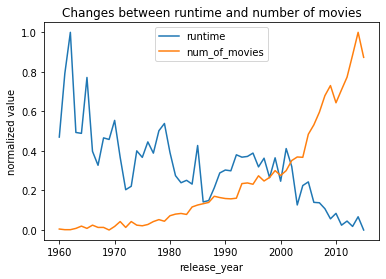

In [54]:
# Plot runtime and number of movies throught the years
sns.lineplot(x='release_year', y = 'runtime', legend='brief', data=normal_data)
sns.lineplot(x='release_year', y = 'num_of_movies',legend='brief', data=normal_data)
plt.ylabel('normalized value')
plt.legend(['runtime','num_of_movies'])
plt.title("Changes between runtime and number of movies")

__*So, the average runtime of movies decreased from 1960 to 2015 while the number of movies increased.
Theere was a dsudden increase in the of movies released after 2005/06 years but their average runtime decreased drastically too.*__

<a id='conclusions'></a>
## Conclusions

- __Drama is the most popular genre followed by Comedy and Action with Thriller on the fourth position while the Foreign movie is the least popular genre.__
- __Popularity and the budget of a movie has strong correlation with the revenue it generates.__
- __September, October, December and August are the most popular month to release movies.__
- __Movies released in June have the highest revenue followed by the month of December. May, July and November are other months with high revenues, completing the top five months.__
- __September and October have performed bad in terms of earning revenues despite having high releases over the years.__
- __The average runtime of movies are decreasing while the number of movies released are increasing.__

### Limitations

- The data contain many Null values that resulted in significant number of records(rows) being dropped.That means many useful data(1059 rows) were dropped to make dataframe free of 'NAN' or Null values. That is why the conclusion made would have been more accurate and precise had there were no or only few null values.

- The columns 'budget_adj' and 'revenue_adj' do not mention the currency type. We don't now if the budget and revenue are of different currency or same currency. Hence the accuracy regarding the visualiztion of budget and revenue of the movies are not reliable unless the consisitency on the currency can be verified.

- The runtime of movies do not explicitly define the unit of time, but having knowm about the movies, I assumed it be in minutes. The runtime of some movies were unrealistically high implying for the runtime of extended cut of those movies. This showed that the runtime of movies were not consistent. Hence the runtime calculations must be consistent to get accurate results.

<a id='ref'></a>
## References

1. Pandas Library Documentation at https://pandas.pydata.org/docs/.
2. Numpy Library Documentation at https://numpy.org/doc/stable/.
3. Matplotlib Library Documenation at https://matplotlib.org/3.3.1/contents.html .
4. Seaborn Library at https://seaborn.pydata.org/ .